In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *
from jove.JoveEditor import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 5094, done.
remote: Counting objects: 100% (460/460), done.
remote: Compressing objects: 100% (321/321), done.
remote: Total 5094 (delta 265), reused 308 (delta 124), pack-reused 4634
Receiving objects: 100% (5094/5094), 7.64 MiB | 24.37 MiB/s, done.
Resolving deltas: 100% (3270/3270), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help

# Question 1, Part (a) : Develop a CFG and then a PDA that directly encodes this CFG for the language Labcd

 
## Labcd = { a^i b^j c^k d^l : if i=2 then j=k else l > k }

### NOTE it is d raised to "ell" not d raised to "one" (as l and 1  -- ELL and ONE -- often look similar)

## Type the PDA Design directly below

## But begin the PDA design with the CFG productions you developed

## Then, for each PDA transition, put the CFG rule it encodes as comments

## See additional details below

# You may begin your design with nonterminal names of > 1 character

## BUT finally, you need single-character non-terminals for Jove's CFG simulation using PDA

In [16]:

#----- MY FINAL PRODUCTION  RULES ARE HERE after I turned all non-terminals into 1-character non-terminals ------

# ....
# S -> aA | bB | cCd | dD
# A -> aX | aA | bB | cCD | dD
# B -> bB | cCd | dD
# C -> cCd | dD
# D -> dD | ''
# X -> aA | bXcD | ''  # This matches b's and c's and returning to main A state if there are >3 a's

#----- MY PDA IS BELOW



Labcd = md2mc('''

PDA

!! Standard transitions
I : '', # ; S# -> W
W : '', # ; # -> F

!! Sigma-based transitions
W : a, a; '' -> W
W : b, b; '' -> W
W : c, c; '' -> W
W : d, d; '' -> W

!!--- be neat and careful as you have to avoid mistakes ---

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! S -> aA | bB | cCd | dD
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
W : '',S ; aA -> W
W : '',S ; bB -> W
W : '',S ; cCd -> W
W : '',S ; dD -> W

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! A -> aX | aA | bB | cCD | dD
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
W : '',A ; aX -> W
W : '',A ; aA -> W
W : '',A ; bB -> W
W : '',A ; cCd -> W
W : '',A ; dD -> W

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! B -> bB | cCd | dD
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
W : '',B ; bB -> W
W : '',B ; cCd -> W
W : '',B ; dD -> W

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! C -> cCd | dD
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
W : '',C ; cCd -> W
W : '',C ; dD -> W

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! D -> dD | ''
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
W : '',D ; dD -> W
W : '',D ; '' -> W

!! PUT YOUR CFG PRODUCTION RULE OR RULES HERE
!! X -> aA | bXcD | ''
!! PUT WHAT PDA TRANSITIONS IT GENERATED, BELOW
W : '',X ; aA -> W
W : '',X ; bXcD -> W
W : '',X ; '' -> W


''')


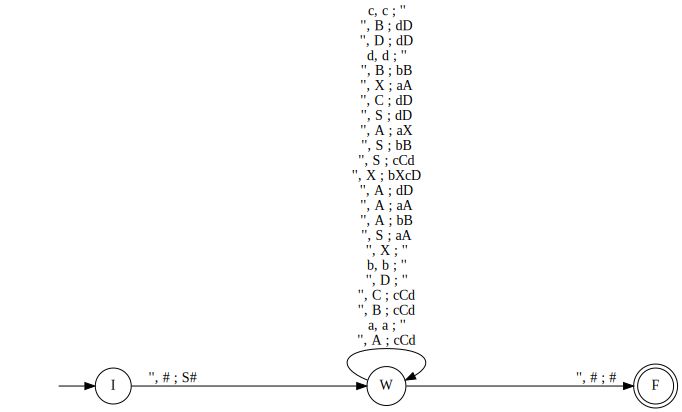

In [4]:
dotObj_pda(Labcd, FuseEdges=True)

# Question 1, Part (b) : 

In [5]:
explore_pda('d', Labcd)

String d accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'd', '#')
->  ('W', 'd', 'S#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [6]:
explore_pda('dd', Labcd)

String dd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'dd', '#')
->  ('W', 'dd', 'S#')
->  ('W', 'dd', 'dD#')
->  ('W', 'd', 'D#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [7]:
explore_pda('cdd', Labcd)

String cdd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'cdd', '#')
->  ('W', 'cdd', 'S#')
->  ('W', 'cdd', 'cCd#')
->  ('W', 'dd', 'Cd#')
->  ('W', 'dd', 'dDd#')
->  ('W', 'd', 'Dd#')
->  ('W', 'd', 'd#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [8]:
explore_pda('ccdd', Labcd)

String ccdd rejected by your PDA :-(
Visited states are:
{('W', 'd', 'Ddd#'), ('W', 'ccdd', 'cCd#'), ('W', 'cdd', 'dDd#'), ('W', 'ccdd', 'dD#'), ('W', 'd', 'dDdd#'), ('W', 'ccdd', 'aA#'), ('W', '', 'dDdd#'), ('W', 'cdd', 'Cd#'), ('W', 'cdd', 'cCdd#'), ('I', 'ccdd', '#'), ('W', 'dd', 'cCddd#'), ('W', '', 'd#'), ('W', '', 'dd#'), ('W', '', 'Ddd#'), ('W', 'dd', 'Cdd#'), ('W', 'ccdd', 'S#'), ('W', 'd', 'dd#'), ('W', 'ccdd', 'bB#'), ('W', 'dd', 'dDdd#')}


In [9]:
explore_pda('ccd', Labcd)

String ccd rejected by your PDA :-(
Visited states are:
{('W', 'ccd', 'bB#'), ('W', 'ccd', 'S#'), ('W', 'cd', 'cCdd#'), ('W', 'cd', 'Cd#'), ('W', 'd', 'cCddd#'), ('W', '', 'dd#'), ('W', 'd', 'dDdd#'), ('W', '', 'Ddd#'), ('W', 'd', 'Cdd#'), ('W', 'ccd', 'aA#'), ('W', 'ccd', 'cCd#'), ('W', '', 'dDdd#'), ('W', 'cd', 'dDd#'), ('W', 'ccd', 'dD#'), ('I', 'ccd', '#')}


In [10]:
explore_pda('acd', Labcd)

String acd rejected by your PDA :-(
Visited states are:
{('W', 'cd', 'aX#'), ('W', 'cd', 'aA#'), ('W', 'acd', 'S#'), ('W', 'd', 'dDd#'), ('W', '', 'Dd#'), ('W', 'd', 'Cd#'), ('W', 'cd', 'A#'), ('W', 'cd', 'dD#'), ('W', 'acd', 'aA#'), ('W', 'cd', 'bB#'), ('W', '', 'd#'), ('W', 'cd', 'cCd#'), ('I', 'acd', '#'), ('W', 'acd', 'bB#'), ('W', 'acd', 'cCd#'), ('W', '', 'dDd#'), ('W', 'acd', 'dD#'), ('W', 'd', 'cCdd#')}


In [11]:
explore_pda('aacd', Labcd)

String aacd rejected by your PDA :-(
Visited states are:
{('W', 'cd', 'aX#'), ('W', 'cd', 'aA#'), ('W', 'd', 'dDd#'), ('W', 'cd', 'X#'), ('W', 'aacd', 'S#'), ('I', 'aacd', '#'), ('W', '', 'Dd#'), ('W', 'd', 'Cd#'), ('W', 'cd', 'A#'), ('W', 'cd', 'dD#'), ('W', 'acd', 'aA#'), ('F', 'cd', '#'), ('W', 'cd', 'bB#'), ('W', '', 'd#'), ('W', 'cd', 'cCd#'), ('W', 'cd', 'bXcD#'), ('W', 'acd', 'aX#'), ('W', 'acd', 'bB#'), ('W', 'aacd', 'bB#'), ('W', 'acd', 'cCd#'), ('W', 'aacd', 'dD#'), ('W', 'acd', 'A#'), ('W', '', 'dDd#'), ('W', 'acd', 'dD#'), ('W', 'aacd', 'cCd#'), ('W', 'aacd', 'aA#'), ('W', 'd', 'cCdd#'), ('W', 'cd', '#')}


In [12]:
explore_pda('aaad', Labcd)

String aaad accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaad', '#')
->  ('W', 'aaad', 'S#')
->  ('W', 'aaad', 'aA#')
->  ('W', 'aad', 'A#')
->  ('W', 'aad', 'aA#')
->  ('W', 'ad', 'A#')
->  ('W', 'ad', 'aA#')
->  ('W', 'd', 'A#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaad', '#')
->  ('W', 'aaad', 'S#')
->  ('W', 'aaad', 'aA#')
->  ('W', 'aad', 'A#')
->  ('W', 'aad', 'aX#')
->  ('W', 'ad', 'X#')
->  ('W', 'ad', 'aA#')
->  ('W', 'd', 'A#')
->  ('W', 'd', 'dD#')
->  ('W', '', 'D#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [13]:
explore_pda('aaaccdd', Labcd)

String aaaccdd rejected by your PDA :-(
Visited states are:
{('W', 'd', 'Ddd#'), ('W', 'ccdd', 'cCd#'), ('W', 'aaaccdd', 'bB#'), ('W', 'cdd', 'dDd#'), ('F', 'ccdd', '#'), ('W', 'ccdd', 'dD#'), ('I', 'aaaccdd', '#'), ('W', 'accdd', 'X#'), ('W', 'accdd', 'aA#'), ('W', 'accdd', 'aX#'), ('W', '', 'dDdd#'), ('W', 'cdd', 'cCdd#'), ('W', 'ccdd', '#'), ('W', '', 'dd#'), ('W', 'aaccdd', 'A#'), ('W', 'aaccdd', 'dD#'), ('W', 'aaaccdd', 'aA#'), ('W', 'dd', 'Cdd#'), ('W', 'aaccdd', 'cCd#'), ('W', 'd', 'dd#'), ('W', 'ccdd', 'bB#'), ('W', 'aaaccdd', 'dD#'), ('W', 'accdd', 'A#'), ('W', 'accdd', 'bXcD#'), ('W', 'aaaccdd', 'cCd#'), ('W', 'accdd', 'cCd#'), ('W', 'aaaccdd', 'S#'), ('F', 'accdd', '#'), ('W', 'accdd', 'dD#'), ('W', 'd', 'dDdd#'), ('W', 'ccdd', 'X#'), ('W', 'ccdd', 'aA#'), ('W', 'ccdd', 'aX#'), ('W', 'cdd', 'Cd#'), ('W', 'aaccdd', 'aA#'), ('W', 'dd', 'cCddd#'), ('W', '', 'd#'), ('W', 'accdd', '#'), ('W', '', 'Ddd#'), ('W', 'aaccdd', 'aX#'), ('W', 'aaccdd', 'bB#'), ('W', 'accdd', 'bB#'), ('W'

In [14]:
explore_pda('aaaccddd', Labcd)

String aaaccddd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaccddd', '#')
->  ('W', 'aaaccddd', 'S#')
->  ('W', 'aaaccddd', 'aA#')
->  ('W', 'aaccddd', 'A#')
->  ('W', 'aaccddd', 'aA#')
->  ('W', 'accddd', 'A#')
->  ('W', 'accddd', 'aA#')
->  ('W', 'ccddd', 'A#')
->  ('W', 'ccddd', 'cCd#')
->  ('W', 'cddd', 'Cd#')
->  ('W', 'cddd', 'cCdd#')
->  ('W', 'ddd', 'Cdd#')
->  ('W', 'ddd', 'dDdd#')
->  ('W', 'dd', 'Ddd#')
->  ('W', 'dd', 'dd#')
->  ('W', 'd', 'd#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaccddd', '#')
->  ('W', 'aaaccddd', 'S#')
->  ('W', 'aaaccddd', 'aA#')
->  ('W', 'aaccddd', 'A#')
->  ('W', 'aaccddd', 'aX#')
->  ('W', 'accddd', 'X#')
->  ('W', 'accddd', 'aA#')
->  ('W', 'ccddd', 'A#')
->  ('W', 'ccddd', 'cCd#')
->  ('W', 'cddd', 'Cd#')
->  ('W', 'cddd', 'cCdd#')
->  ('W', 'ddd', 'Cdd#')
->  ('W', 'ddd', 'dDdd#')
->  ('W', 'dd', 'Ddd#')
->  ('

# Questions 2 and 3: Now do the PL proofs of MT2
## Check Canvas for the actual question wording. 
## You have to answer this on Canvas.